# Plot Predictions Over Time for Compressor Models
This notebook visualizes the predictions saved by `save_best_trials_data.py` over time. For each compressor model (`a`, `b`, or `all`), a separate figure is created. Each figure contains a subplot for each compressor unit (column `Unidade` in the CSV file). Only the first test (`N_ensaio = 0`) is plotted, and the background is colored gray where the true label (`Y_true`) is 0.

In [9]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [10]:
# Check current working directory
import os
print("Current working directory:", os.getcwd())
print("Contents of current directory:", os.listdir('.'))

Current working directory: /media/ntfs/Documentos/LIAE/RunningIn_semiSuperv/RunningIn_semiSuperv
Contents of current directory: ['benchmark_optuna.py', 'main_optuna_full_optimizer.py', 'main_optuna_pareto_stop.py', 'main_singleTest.py', 'pareto_analysis.ipynb', 'plot_pareto.py', 'plot_predictions_over_time.ipynb', 'postgres_config.json', 'postgres_config.json.example', 'save_best_trials_data.py', 'utils', '__init__.py', '__pycache__']


## Load Prediction Data (Both Test and Train)
Load both the test and train CSV files generated by `save_best_trials_data.py` for each compressor model (`a`, `b`, `all`) and combine them into pandas DataFrames for plotting.

In [11]:
# Load Prediction Data for All Classifiers (Both Test and Train)
import glob

# Use absolute path to the Results/data directory
base_path = os.path.join(os.path.dirname(os.getcwd()), 'Results', 'data_max_MCC')
print(f"Looking for data files in: {base_path}")
print(f"Directory exists: {os.path.exists(base_path)}")

# Find all classifier files for each compressor model (both test and train)
data = {}
compressor_models = ['a', 'b', 'all']
data_types = ['test', 'train']

for model in compressor_models:
    data[model] = {}
    
    for data_type in data_types:
        pattern = os.path.join(base_path, f'data_{data_type}_RunIn_*_{model}.csv')
        files = glob.glob(pattern)
        print(f"Pattern for {data_type} data, model {model}: {pattern}")
        print(f"Found {len(files)} {data_type} files for model {model}")
        
        for file in files:
            # Extract classifier name from filename
            # Pattern: data_{test/train}_RunIn_{classifier}_{model}.csv
            filename = os.path.basename(file)
            classifier = filename.replace(f'data_{data_type}_RunIn_', '').replace(f'_{model}.csv', '')
            
            # Initialize classifier dict if not exists
            if classifier not in data[model]:
                data[model][classifier] = {}
            
            try:
                df = pd.read_csv(file)
                # Add a column to identify data type
                df['data_type'] = data_type
                data[model][classifier][data_type] = df
                print(f"Loaded {classifier} {data_type} for model {model}: {len(df)} rows")
            except Exception as e:
                print(f"Error loading {file}: {e}")

# Combine test and train data for each classifier and model
data_combined = {}
for model in compressor_models:
    data_combined[model] = {}
    for classifier in data[model].keys():
        # Check if both test and train data exist
        if 'test' in data[model][classifier] and 'train' in data[model][classifier]:
            # Combine test and train data
            combined_df = pd.concat([
                data[model][classifier]['train'],
                data[model][classifier]['test']
            ], ignore_index=True)
            data_combined[model][classifier] = combined_df
            print(f"Combined {classifier} for model {model}: {len(combined_df)} rows (train + test)")
        else:
            missing_types = []
            if 'test' not in data[model][classifier]:
                missing_types.append('test')
            if 'train' not in data[model][classifier]:
                missing_types.append('train')
            print(f"Warning: Missing {', '.join(missing_types)} data for {classifier}, model {model}")

print(f"\nCombined data for models: {list(data_combined.keys())}")
for model, classifiers in data_combined.items():
    print(f"Model {model}: {list(classifiers.keys())}")

Looking for data files in: /media/ntfs/Documentos/LIAE/RunningIn_semiSuperv/Results/data_max_MCC
Directory exists: True
Pattern for test data, model a: /media/ntfs/Documentos/LIAE/RunningIn_semiSuperv/Results/data_max_MCC/data_test_RunIn_*_a.csv
Found 10 test files for model a
Loaded AdaBoost test for model a: 4299 rows
Loaded DecisionTreeClassifier test for model a: 4410 rows
Loaded KNeighborsClassifier test for model a: 4194 rows
Loaded LinearSVM test for model a: 4278 rows
Loaded LogisticRegression test for model a: 4194 rows
Loaded NeuralNet test for model a: 4230 rows
Loaded QDA test for model a: 4284 rows
Loaded RandomForest test for model a: 4296 rows
Loaded LinearSVM test for model a: 4278 rows
Loaded LogisticRegression test for model a: 4194 rows
Loaded NeuralNet test for model a: 4230 rows
Loaded QDA test for model a: 4284 rows
Loaded RandomForest test for model a: 4296 rows
Loaded RBFSVM test for model a: 4302 rows
Loaded NaiveBayes test for model a: 4266 rows
Pattern for tr

## Filter Data for First Test (N_ensaio = 0)
Filter each combined DataFrame to include only rows where `N_ensaio == 0` from both test and train data.

In [12]:
# Filter Combined Data for First Test (N_ensaio = 0)
data_first_test = {}
for model, classifiers in data_combined.items():
    data_first_test[model] = {}
    for classifier, df in classifiers.items():
        filtered_df = df[df['N_ensaio'] == 0].copy()
        data_first_test[model][classifier] = filtered_df
        
        # Count rows by data type
        train_rows = len(filtered_df[filtered_df['data_type'] == 'train'])
        test_rows = len(filtered_df[filtered_df['data_type'] == 'test'])
        print(f"Model {model}, Classifier {classifier}: {len(filtered_df)} total rows after filtering")
        print(f"  - Train: {train_rows} rows, Test: {test_rows} rows")

Model a, Classifier AdaBoost: 9849 total rows after filtering
  - Train: 8337 rows, Test: 1512 rows
Model a, Classifier DecisionTreeClassifier: 10004 total rows after filtering
  - Train: 8455 rows, Test: 1549 rows
Model a, Classifier KNeighborsClassifier: 9738 total rows after filtering
  - Train: 8261 rows, Test: 1477 rows
Model a, Classifier LinearSVM: 9846 total rows after filtering
  - Train: 8341 rows, Test: 1505 rows
Model a, Classifier LogisticRegression: 9738 total rows after filtering
  - Train: 8261 rows, Test: 1477 rows
Model a, Classifier NeuralNet: 9779 total rows after filtering
  - Train: 8290 rows, Test: 1489 rows
Model a, Classifier QDA: 9833 total rows after filtering
  - Train: 8326 rows, Test: 1507 rows
Model a, Classifier RandomForest: 9856 total rows after filtering
  - Train: 8345 rows, Test: 1511 rows
Model a, Classifier RBFSVM: 9854 total rows after filtering
  - Train: 8341 rows, Test: 1513 rows
Model a, Classifier NaiveBayes: 9820 total rows after filtering


## Plot Predictions Over Time for Each Compressor Model
For each compressor model, create a figure. For each unique `Unidade` in the filtered data, create a subplot. Compare all classifiers' predictions (`Y_score`) from both test and train data and show the true labels (`Y_true`) over `Tempo`. Use different line styles for test vs train data. Color the background gray where `Y_true == 0`.

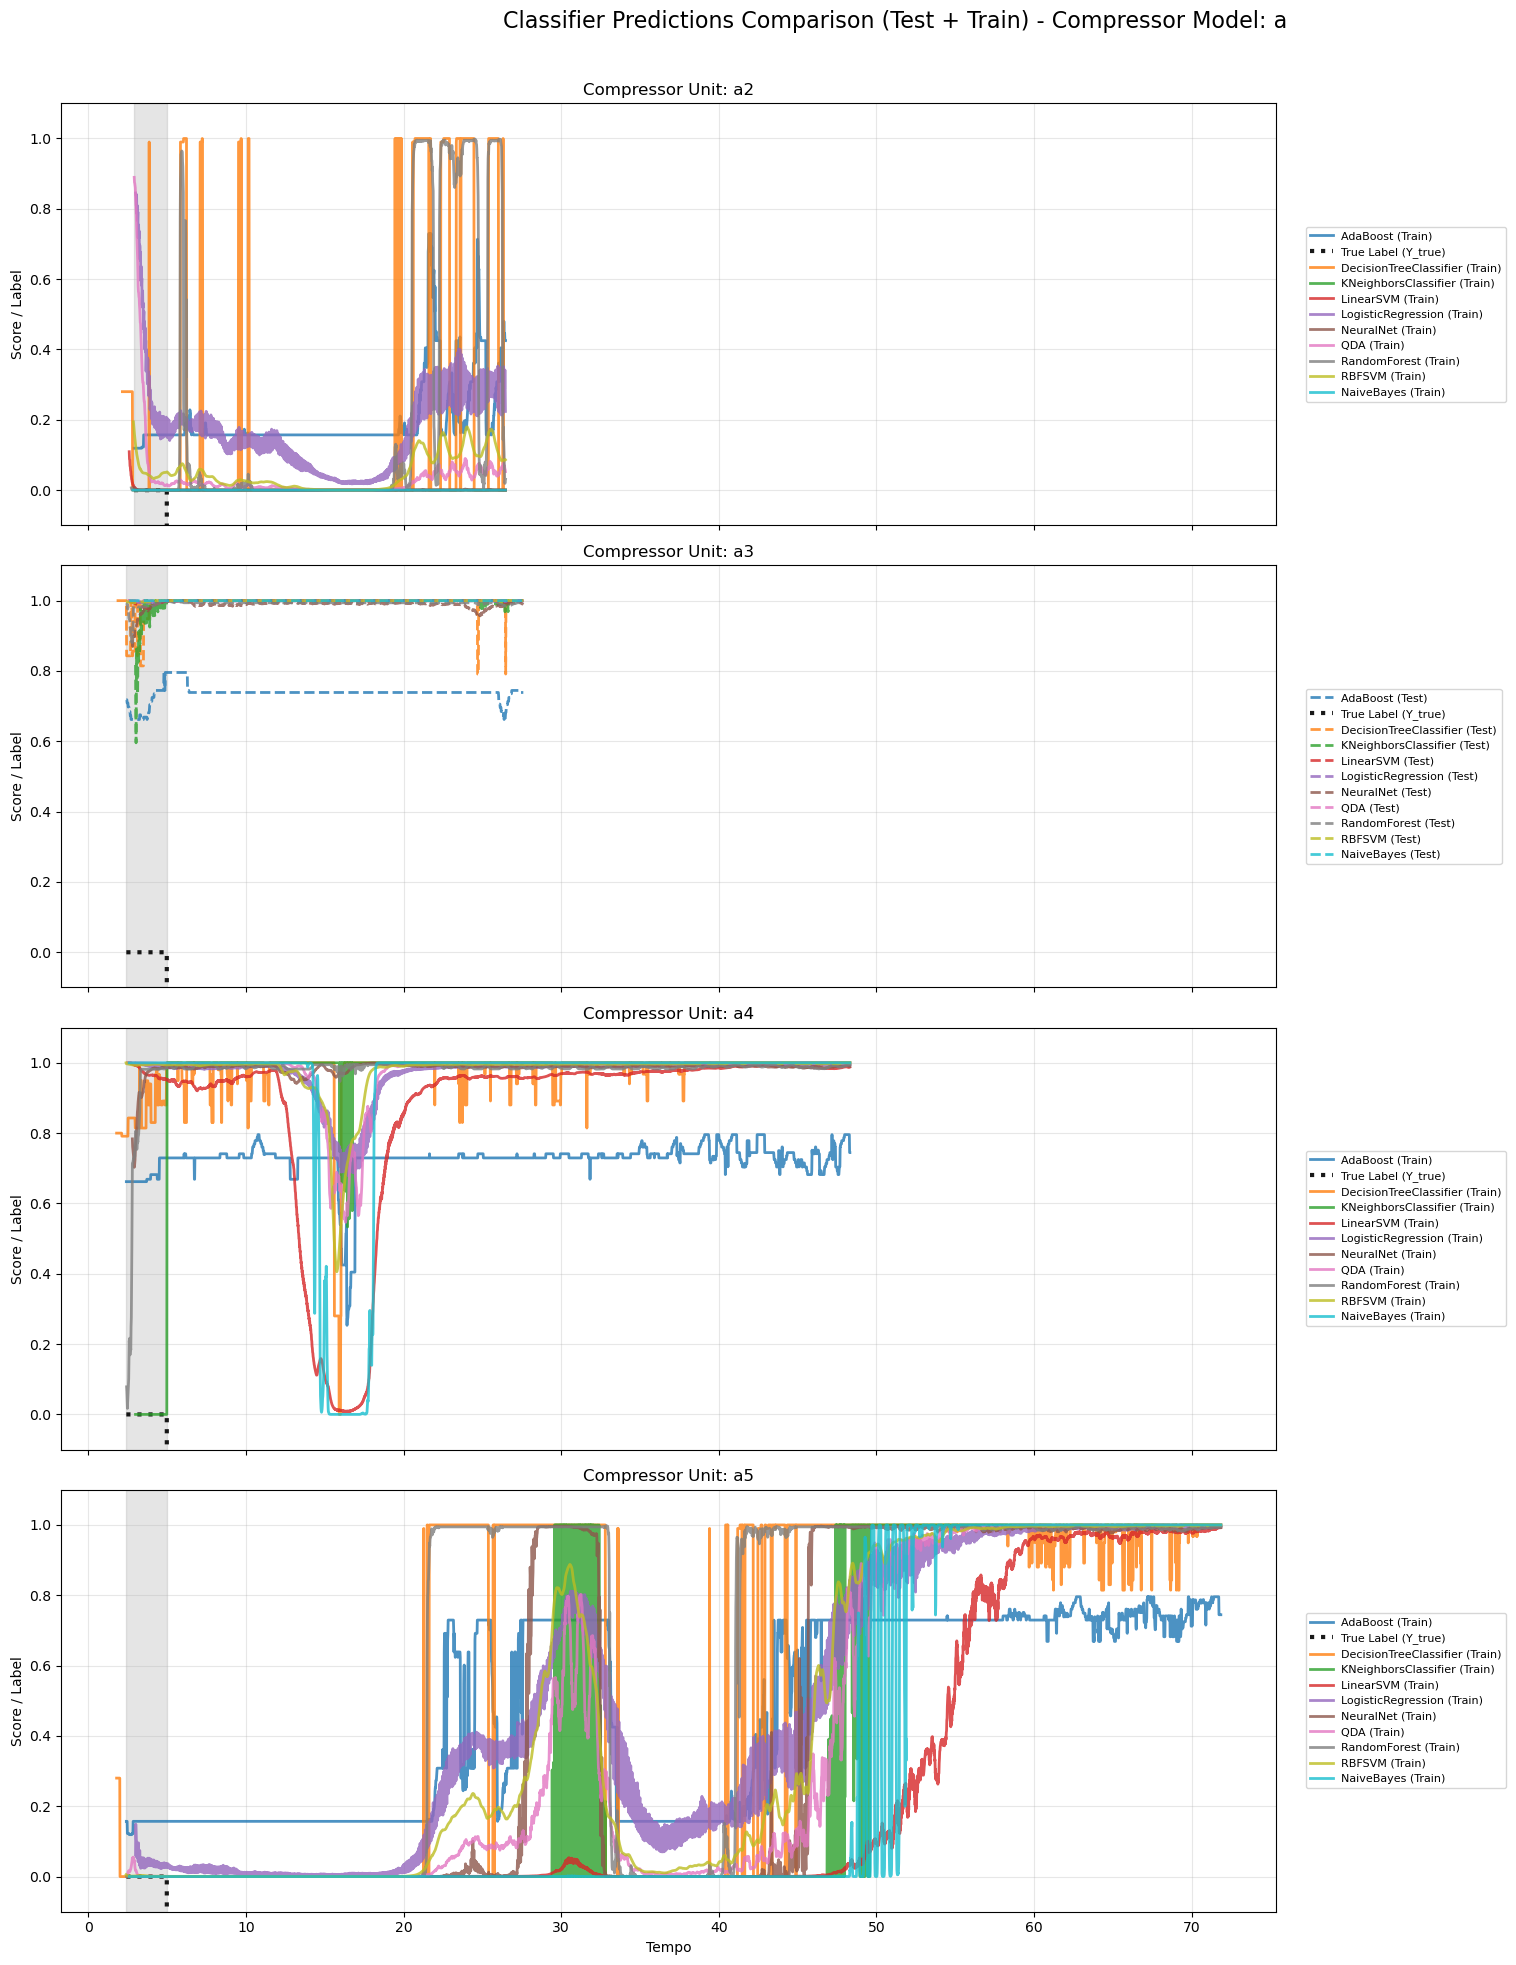

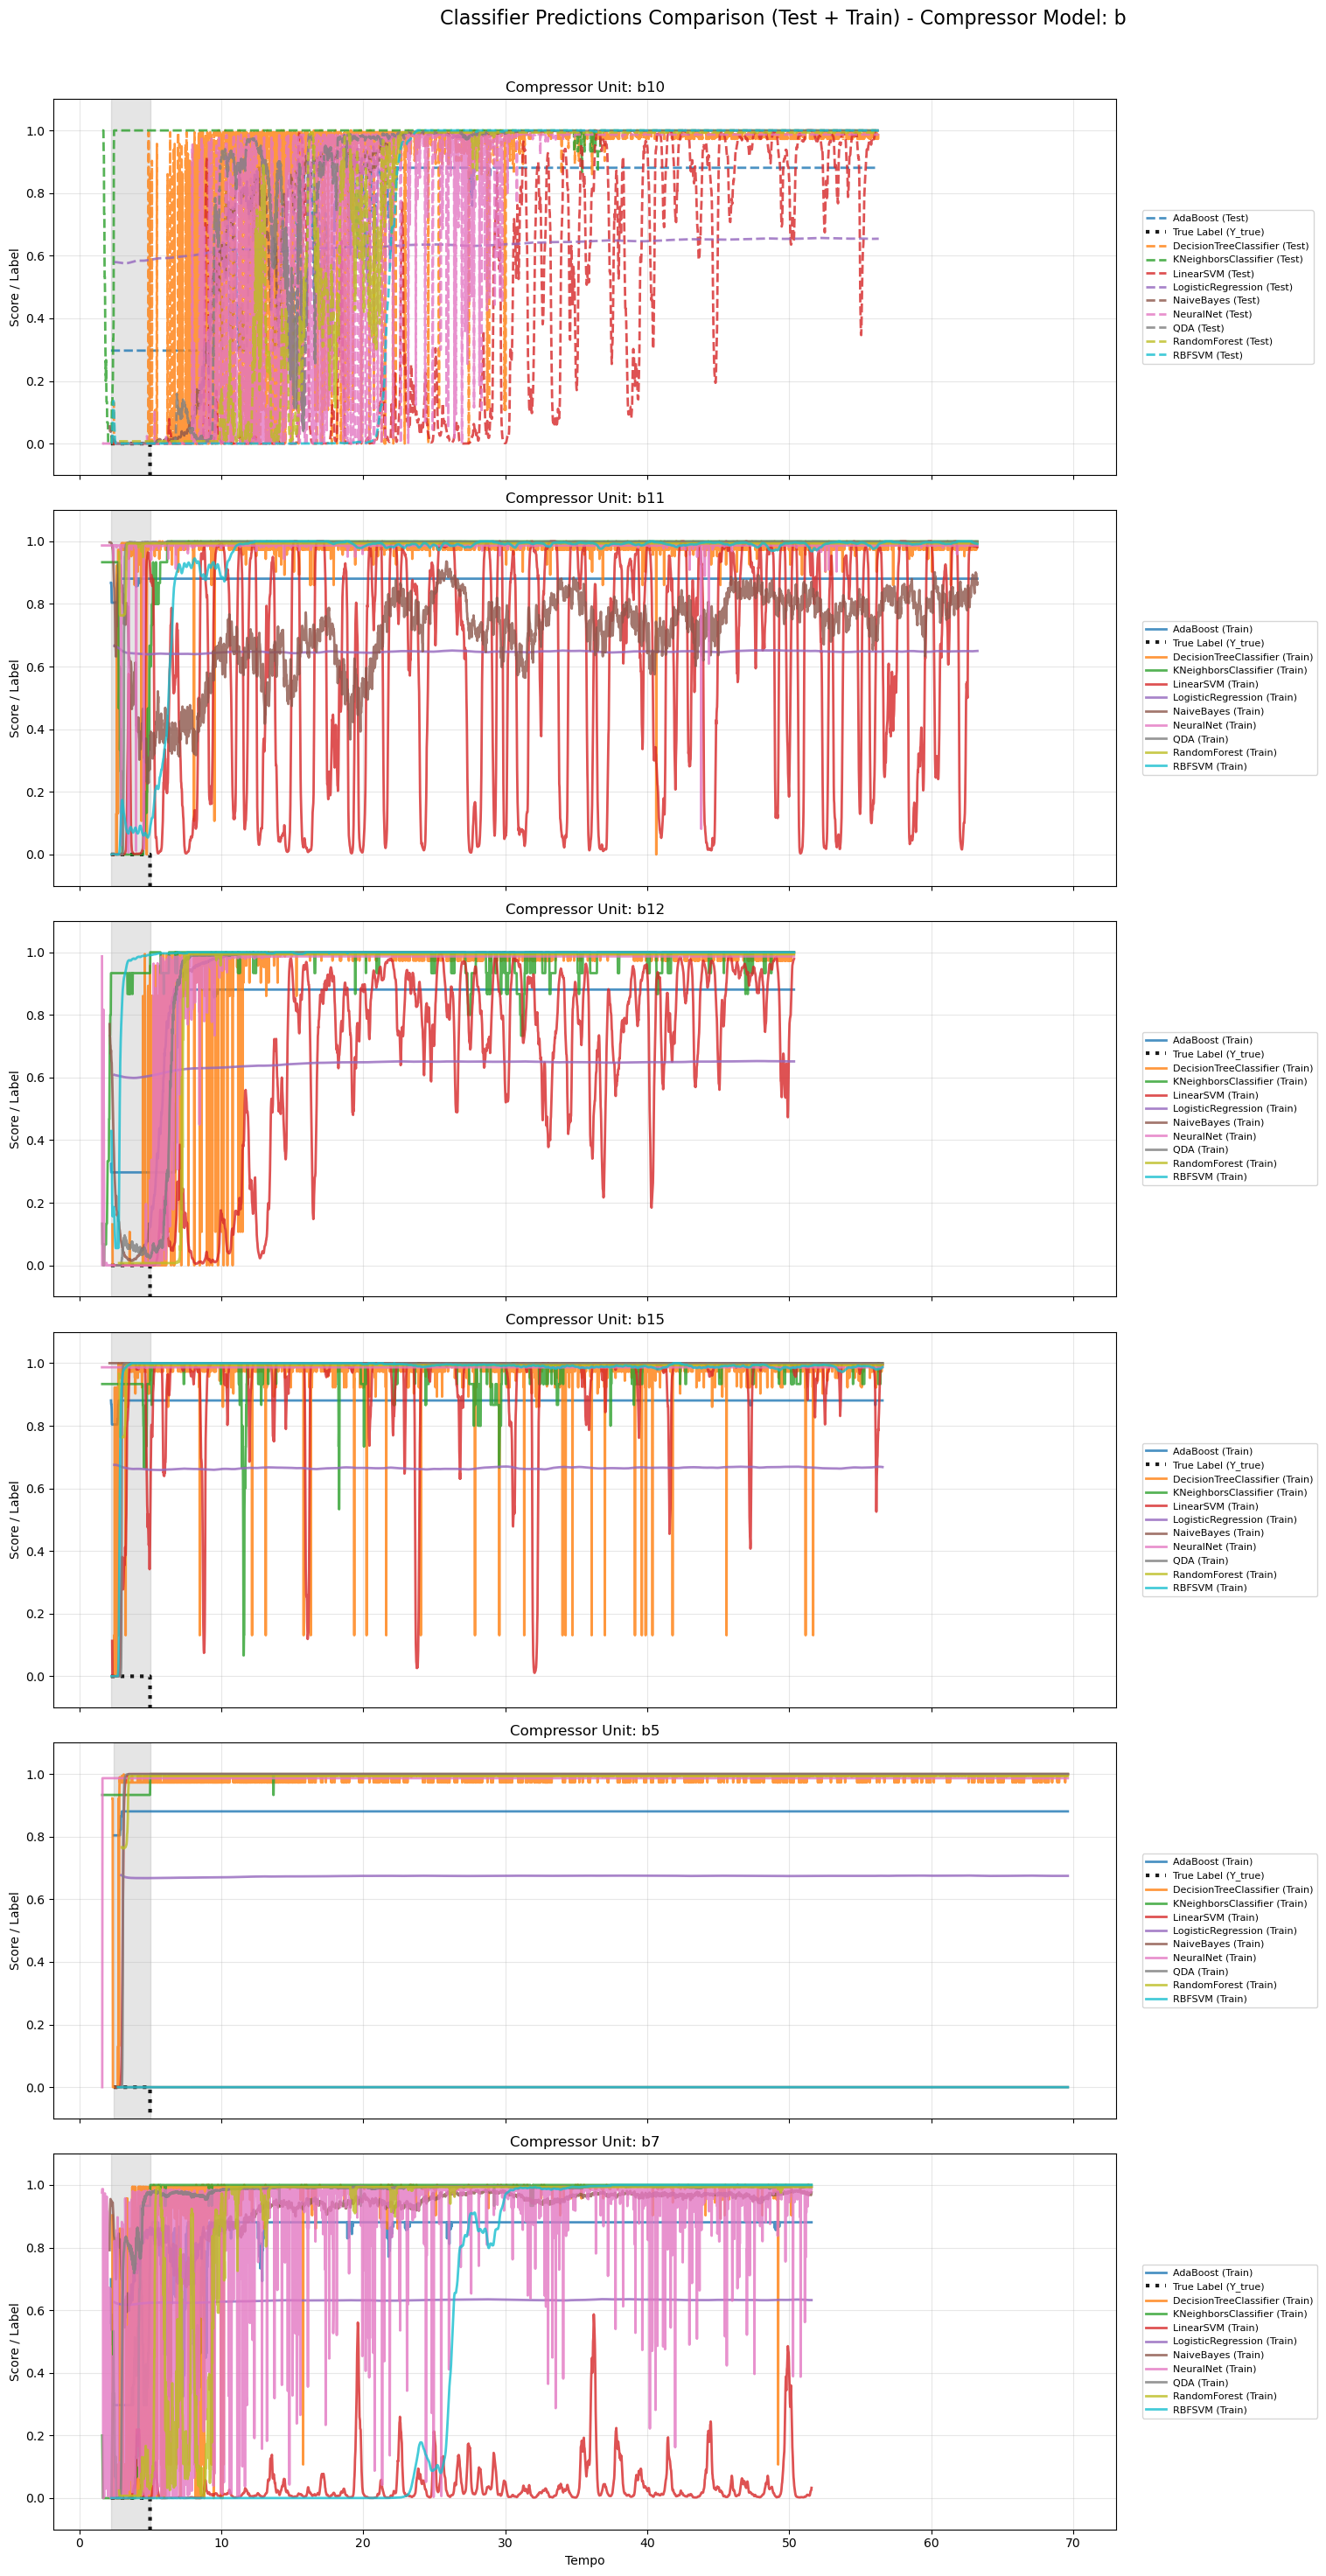

In [ ]:
# Plot Predictions Over Time for Each Compressor Model (Test and Train Data)
import matplotlib.colors as mcolors

# Define colors for different classifiers
colors = list(mcolors.TABLEAU_COLORS.values())

for model, classifiers_data in data_first_test.items():
    if not classifiers_data:
        print(f"No data found for model {model}")
        continue
    
    # Get all unique units from all classifiers for this model
    all_unidades = set()
    for classifier, df in classifiers_data.items():
        all_unidades.update(df['Unidade'].unique())
    
    all_unidades = sorted(list(all_unidades))
    n_units = len(all_unidades)
    
    if n_units == 0:
        print(f"No units found for model {model}")
        continue
    
    fig, axes = plt.subplots(n_units, 1, figsize=(18, 5 * n_units), sharex=True)
    if n_units == 1:
        axes = [axes]
    
    fig.suptitle(f'Classifier Predictions Comparison (Test + Train) - Compressor Model: {model}', fontsize=16)
    
    for i, unidade in enumerate(all_unidades):
        ax = axes[i]
        
        # Plot each classifier's predictions for this unit
        classifier_names = list(classifiers_data.keys())
        true_label_plotted = False
        
        for j, (classifier, df) in enumerate(classifiers_data.items()):
            unit_df = df[df['Unidade'] == unidade].sort_values('Tempo')
            
            if len(unit_df) == 0:
                continue
            
            # Separate test and train data
            train_df = unit_df[unit_df['data_type'] == 'train'].sort_values('Tempo')
            test_df = unit_df[unit_df['data_type'] == 'test'].sort_values('Tempo')
            
            color = colors[j % len(colors)]
            
            # Plot train data (solid line)
            if len(train_df) > 0:
                ax.plot(train_df['Tempo'], train_df['Y_score'], 
                       label=f'{classifier} (Train)', 
                       color=color, linewidth=2, alpha=0.8, linestyle='-')
            
            # Plot test data (dashed line)
            if len(test_df) > 0:
                ax.plot(test_df['Tempo'], test_df['Y_score'], 
                       label=f'{classifier} (Test)', 
                       color=color, linewidth=2, alpha=0.8, linestyle='--')
            
            # Plot true labels only once (they should be the same across classifiers)
            if not true_label_plotted and len(unit_df) > 0:
                # Use all data for true labels (should be consistent)
                tempo_all = unit_df['Tempo'].sort_values()
                y_true_all = unit_df.set_index('Tempo')['Y_true'].loc[tempo_all]
                
                ax.plot(tempo_all, y_true_all, label='True Label (Y_true)', 
                       color='black', linewidth=3, alpha=0.9, linestyle=':')
                
                # Shade background gray where Y_true == 0
                tempo_values = tempo_all.values
                y_true_values = y_true_all.values
                
                # Find continuous segments where Y_true == 0
                segments = []
                start_idx = None
                for idx in range(len(y_true_values)):
                    if y_true_values[idx] == 0:
                        if start_idx is None:
                            start_idx = idx
                    else:
                        if start_idx is not None:
                            segments.append((start_idx, idx - 1))
                            start_idx = None
                
                # Handle case where last segment extends to the end
                if start_idx is not None:
                    segments.append((start_idx, len(y_true_values) - 1))
                
                # Shade the segments
                for start_idx, end_idx in segments:
                    ax.axvspan(0, tempo_values[end_idx], 
                              color='gray', alpha=0.2)
                
                true_label_plotted = True
        
        ax.set_ylabel('Score / Label')
        ax.set_title(f'Compressor Unit: {unidade}')
        ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=8)
        ax.grid(True, alpha=0.3)
        ax.set_ylim(-0.1, 1.1)
    
    axes[-1].set_xlabel('Tempo')
    plt.tight_layout(rect=[0, 0, 0.85, 0.97])
    plt.show()

## Improved Plot for Compressor Model A
Create a formatted plot specifically for compressor model 'a' with:
- Train units (a2, a3, a4, a5) in the top row (3 plots) + bottom row (1 plot)
- Test unit (a3) in a separate subplot
- X-axis limited to the shortest test duration
- Unit names displayed as text boxes inside plots instead of titles

Units found for model a: ['a2', 'a3', 'a4', 'a5']
Train units: ['a2', 'a4', 'a5']
Test units: ['a3']
Shortest test duration: 26.47 hours
\nPlotting unit a2...
\nPlotting unit a4...
\nPlotting unit a5...
\nPlotting unit a3...


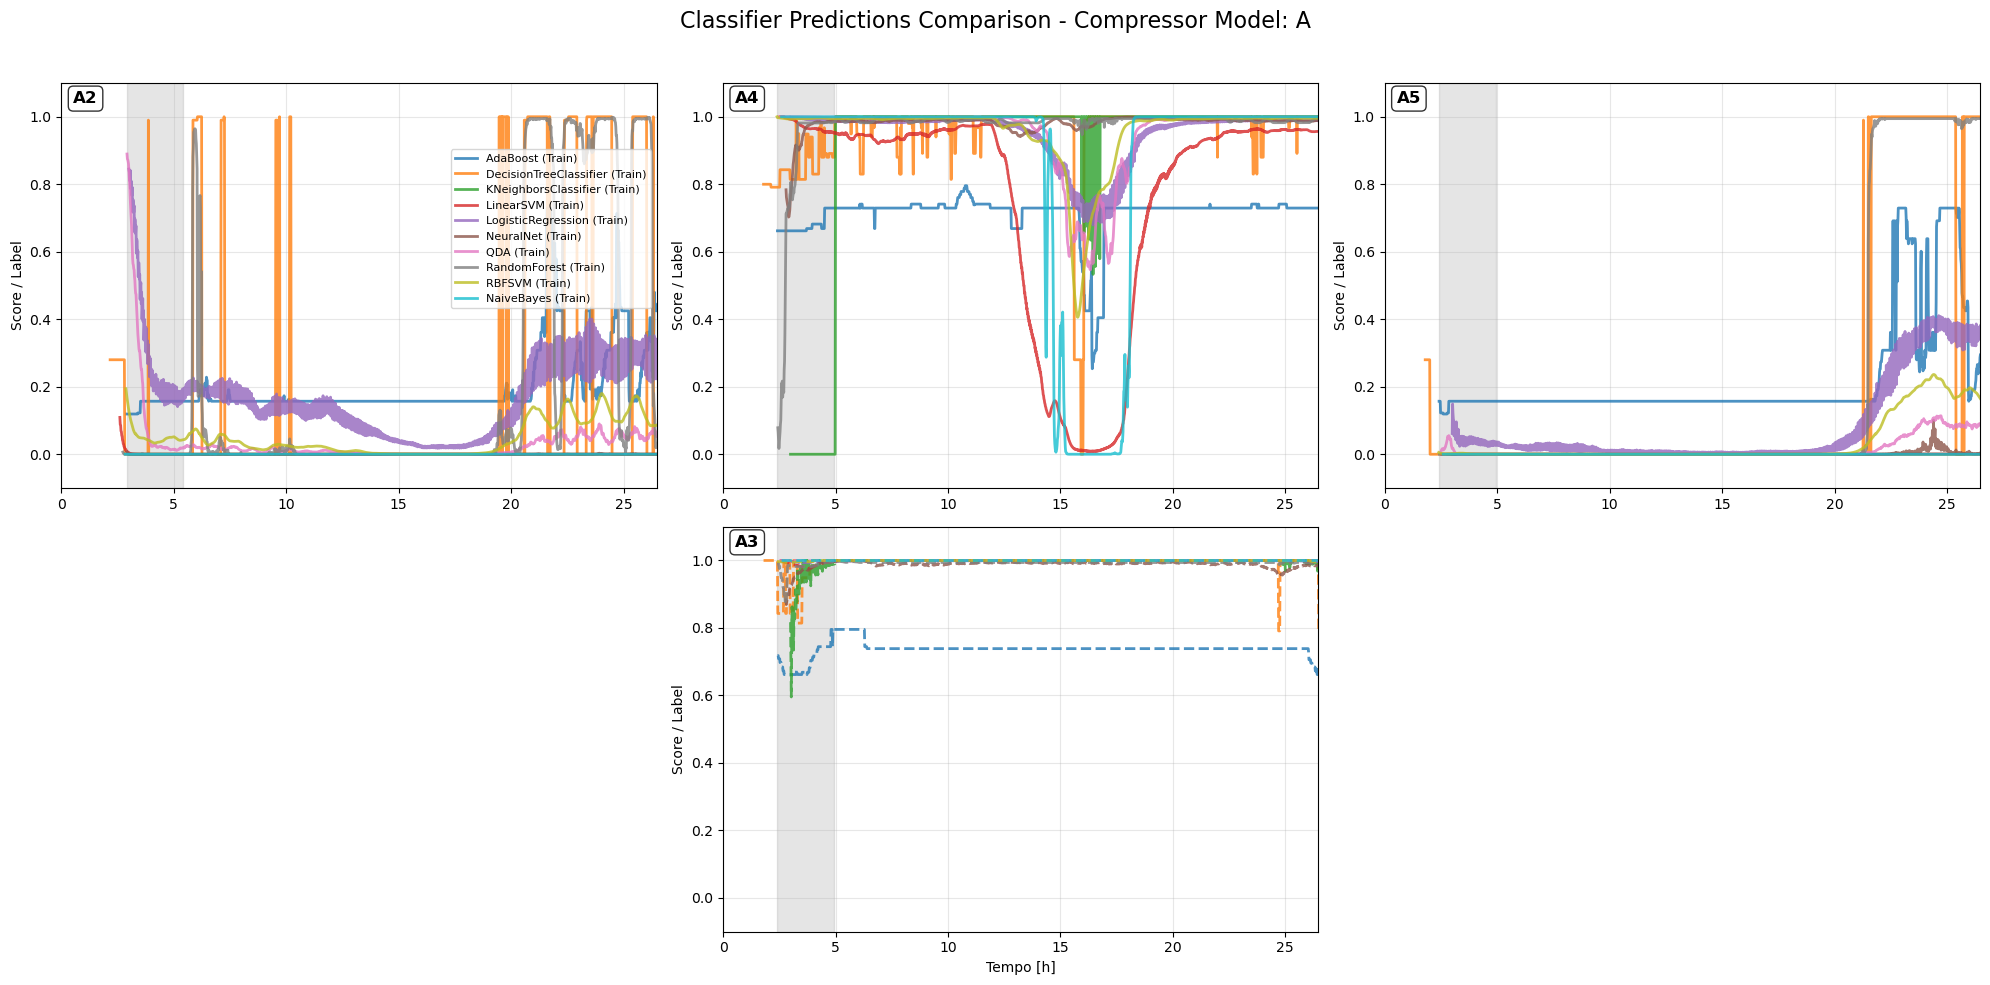

In [ ]:
# Improved Plot for Compressor Model A
import matplotlib.colors as mcolors

# Focus on compressor model 'a'
model = 'a'
if model in data_first_test and data_first_test[model]:
    
    # Get all unique units for model 'a'
    all_units = set()
    for classifier, df in data_first_test[model].items():
        all_units.update(df['Unidade'].unique())
    
    all_units = sorted(list(all_units))
    print(f"Units found for model {model}: {all_units}")
    
    # Separate train and test units
    train_units = [unit for unit in all_units if unit != 'a3']  # a3 is the test unit
    test_units = ['a3']  # a3 is used for testing
    
    print(f"Train units: {train_units}")
    print(f"Test units: {test_units}")
    
    # Calculate the shortest test duration across all units and classifiers
    min_duration = float('inf')
    for classifier, df in data_first_test[model].items():
        for unit in all_units:
            unit_data = df[df['Unidade'] == unit]
            if len(unit_data) > 0:
                unit_duration = unit_data['Tempo'].max()
                min_duration = min(min_duration, unit_duration)
    
    print(f"Shortest test duration: {min_duration:.2f} hours")
    
    # Define colors for different classifiers
    colors = list(mcolors.TABLEAU_COLORS.values())
    
    # Create subplot layout: 2 rows, 3 columns (top row: 3 train units, bottom row: 1 test unit centered)
    fig = plt.figure(figsize=(20, 10))
    
    # Create a grid with train units in top row and test unit in bottom row
    # Top row: 3 train units
    train_axes = []
    for i, unit in enumerate(train_units):
        ax = plt.subplot(2, 3, i + 1)  # Top row positions: 1, 2, 3
        train_axes.append((ax, unit))
    
    # Bottom row: 1 test unit (centered)
    test_ax = plt.subplot(2, 3, 5)  # Bottom center position
    test_axes = [(test_ax, test_units[0])]
    
    # Combine all axes for processing
    all_plot_axes = train_axes + test_axes
    
    fig.suptitle(f'Classifier Predictions Comparison - Compressor Model: {model.upper()}', fontsize=16)
    
    # Plot data for each unit
    for ax, unit in all_plot_axes:
        print(f"\\nPlotting unit {unit}...")
        
        # Determine if this is a train or test unit
        is_test_unit = unit in test_units
        
        true_label_plotted = False
        
        for j, (classifier, df) in enumerate(data_first_test[model].items()):
            unit_df = df[df['Unidade'] == unit].sort_values('Tempo')
            
            if len(unit_df) == 0:
                continue
            
            # Separate test and train data
            train_df = unit_df[unit_df['data_type'] == 'train'].sort_values('Tempo')
            test_df = unit_df[unit_df['data_type'] == 'test'].sort_values('Tempo')
            
            color = colors[j % len(colors)]
            
            # Plot train data (solid line)
            if len(train_df) > 0:
                ax.plot(train_df['Tempo'], train_df['Y_score'], 
                       label=f'{classifier} (Train)', 
                       color=color, linewidth=2, alpha=0.8, linestyle='-')
            
            # Plot test data (dashed line) - only for test units
            if len(test_df) > 0 and is_test_unit:
                ax.plot(test_df['Tempo'], test_df['Y_score'], 
                       label=f'{classifier} (Test)', 
                       color=color, linewidth=2, alpha=0.8, linestyle='--')
            
            # Plot true labels only once
            if not true_label_plotted and len(unit_df) > 0:
                # Use all data for true labels
                tempo_all = unit_df['Tempo'].sort_values()
                
                # Shade background gray where Y_true == 0
                tempo_values = tempo_all.values
                y_true_values = y_true_all.values
                
                # Find continuous segments where Y_true == 0
                segments = []
                start_idx = None
                for idx in range(len(y_true_values)):
                    if y_true_values[idx] == 0:
                        if start_idx is None:
                            start_idx = idx
                    else:
                        if start_idx is not None:
                            segments.append((start_idx, idx - 1))
                            start_idx = None
                
                # Handle case where last segment extends to the end
                if start_idx is not None:
                    segments.append((start_idx, len(y_true_values) - 1))
                
                # Shade the segments
                for start_idx, end_idx in segments:
                    ax.axvspan(0, tempo_values[end_idx], 
                              color='gray', alpha=0.2)
                
                true_label_plotted = True
        
        # Set x-axis limits to shortest test duration
        ax.set_xlim(0, min_duration)
        
        # Add unit name as text box inside the plot
        ax.text(0.02, 0.98, unit.upper(), transform=ax.transAxes, 
               fontsize=12, fontweight='bold', 
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
               verticalalignment='top', horizontalalignment='left')
        
        ax.set_ylabel('Score / Label')
        ax.grid(True, alpha=0.3)
        ax.set_ylim(-0.1, 1.1)
        
        # Only show legend for the first plot to avoid clutter
        if unit == train_units[0]:
            ax.legend(loc='upper right', bbox_to_anchor=(1.0, 0.85), fontsize=8)
    
    # Set x-label only for bottom plots
    test_ax.set_xlabel('Tempo [h]')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
else:
    print(f"No data found for model {model}")

## Improved Plot for Compressor Model B
Create a formatted plot specifically for compressor model 'b' with:
- 6 units distributed across two rows (3 units per row)
- X-axis limited to the shortest test duration
- Unit names displayed as text boxes inside plots instead of titles

Units found for model b: ['b10', 'b11', 'b12', 'b15', 'b5', 'b7']
Train units: ['b11', 'b12', 'b15', 'b5', 'b7']
Test units: ['b10']
Shortest test duration: 50.33 hours
\nPlotting unit b11...
\nPlotting unit b12...
\nPlotting unit b15...
\nPlotting unit b5...
\nPlotting unit b7...
\nPlotting unit b10...
\nPlotting unit b5...
\nPlotting unit b7...
\nPlotting unit b10...


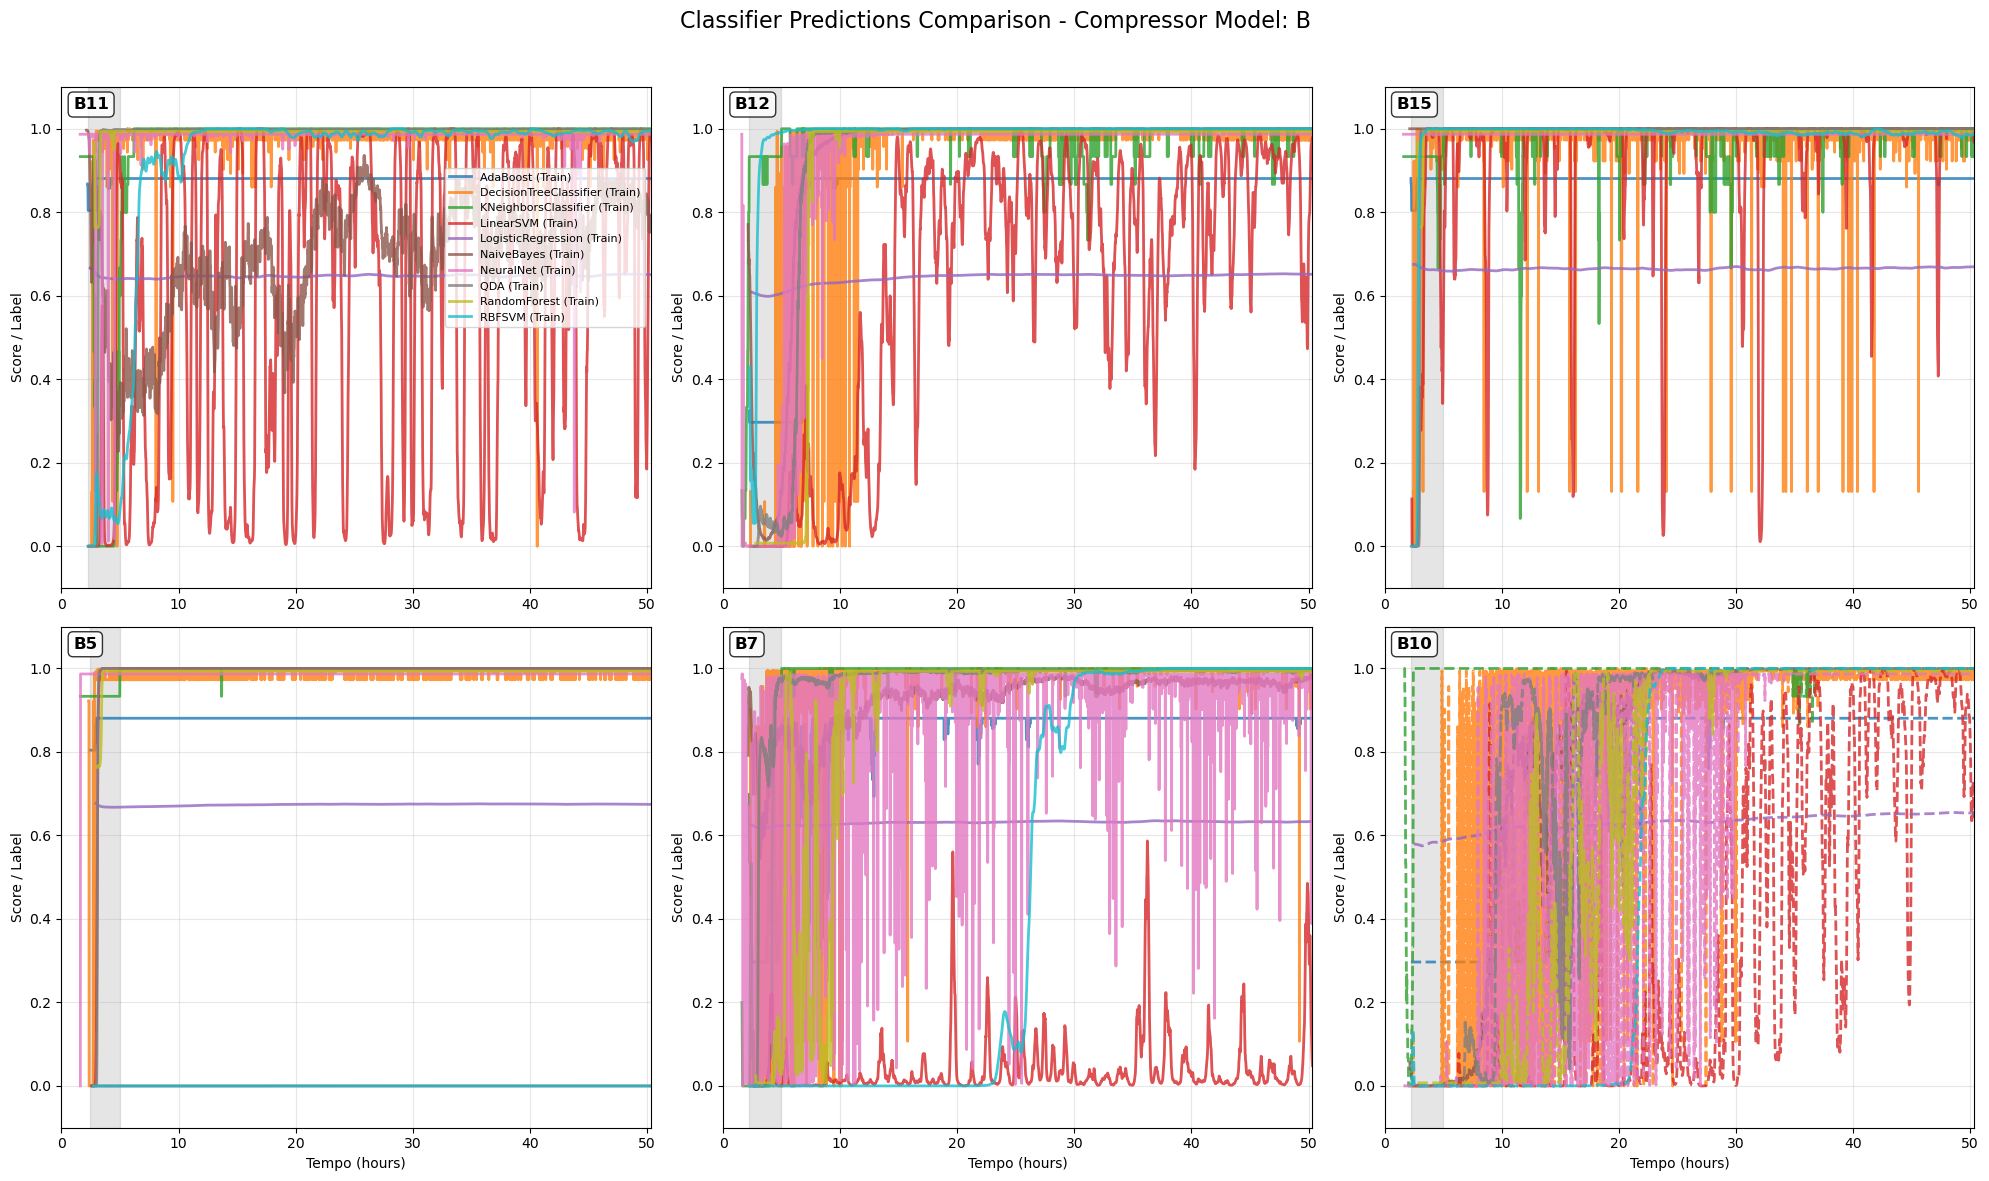

In [ ]:
# Improved Plot for Compressor Model B
import matplotlib.colors as mcolors

# Focus on compressor model 'b'
model = 'b'
if model in data_first_test and data_first_test[model]:
    
    # Get all unique units for model 'b'
    all_units = set()
    for classifier, df in data_first_test[model].items():
        all_units.update(df['Unidade'].unique())
    
    all_units = sorted(list(all_units))
    print(f"Units found for model {model}: {all_units}")
    
    # For model 'b', the test unit is typically 'b10'
    train_units = [unit for unit in all_units if unit != 'b10']  # b10 is the test unit
    test_units = ['b10']  # b10 is used for testing
    
    print(f"Train units: {train_units}")
    print(f"Test units: {test_units}")
    
    # Calculate the shortest test duration across all units and classifiers
    min_duration = float('inf')
    for classifier, df in data_first_test[model].items():
        for unit in all_units:
            unit_data = df[df['Unidade'] == unit]
            if len(unit_data) > 0:
                unit_duration = unit_data['Tempo'].max()
                min_duration = min(min_duration, unit_duration)
    
    print(f"Shortest test duration: {min_duration:.2f} hours")
    
    # Define colors for different classifiers
    colors = list(mcolors.TABLEAU_COLORS.values())
    
    # Create subplot layout: 2 rows, 3 columns (distribute 6 units across 2 rows)
    fig = plt.figure(figsize=(20, 12))
    
    # Arrange all units in a 2x3 grid
    # First, separate train and test units and arrange them
    all_units_to_plot = train_units + test_units
    
    # Create axes for all units (2 rows, 3 columns)
    plot_axes = []
    for i, unit in enumerate(all_units_to_plot):
        row = i // 3  # Integer division to get row (0 or 1)
        col = i % 3   # Modulo to get column (0, 1, or 2)
        ax = plt.subplot(2, 3, i + 1)  # subplot positions are 1-indexed
        plot_axes.append((ax, unit))
    
    fig.suptitle(f'Classifier Predictions Comparison - Compressor Model: {model.upper()}', fontsize=16)
    
    # Plot data for each unit
    for ax, unit in plot_axes:
        print(f"\\nPlotting unit {unit}...")
        
        # Determine if this is a train or test unit
        is_test_unit = unit in test_units
        
        true_label_plotted = False
        
        for j, (classifier, df) in enumerate(data_first_test[model].items()):
            unit_df = df[df['Unidade'] == unit].sort_values('Tempo')
            
            if len(unit_df) == 0:
                continue
            
            # Separate test and train data
            train_df = unit_df[unit_df['data_type'] == 'train'].sort_values('Tempo')
            test_df = unit_df[unit_df['data_type'] == 'test'].sort_values('Tempo')
            
            color = colors[j % len(colors)]
            
            # Plot train data (solid line)
            if len(train_df) > 0:
                ax.plot(train_df['Tempo'], train_df['Y_score'], 
                       label=f'{classifier} (Train)', 
                       color=color, linewidth=2, alpha=0.8, linestyle='-')
            
            # Plot test data (dashed line) - only for test units
            if len(test_df) > 0 and is_test_unit:
                ax.plot(test_df['Tempo'], test_df['Y_score'], 
                       label=f'{classifier} (Test)', 
                       color=color, linewidth=2, alpha=0.8, linestyle='--')
            
            # Plot true labels only once
            if not true_label_plotted and len(unit_df) > 0:
                # Use all data for true labels
                tempo_all = unit_df['Tempo'].sort_values()
                y_true_all = unit_df.set_index('Tempo')['Y_true'].loc[tempo_all]
                
                
                # Shade background gray where Y_true == 0
                tempo_values = tempo_all.values
                y_true_values = y_true_all.values
                
                # Find continuous segments where Y_true == 0
                segments = []
                start_idx = None
                for idx in range(len(y_true_values)):
                    if y_true_values[idx] == 0:
                        if start_idx is None:
                            start_idx = idx
                    else:
                        if start_idx is not None:
                            segments.append((start_idx, idx - 1))
                            start_idx = None
                
                # Handle case where last segment extends to the end
                if start_idx is not None:
                    segments.append((start_idx, len(y_true_values) - 1))
                
                # Shade the segments
                for start_idx, end_idx in segments:
                    ax.axvspan(0, tempo_values[end_idx], 
                              color='gray', alpha=0.2)
                
                true_label_plotted = True
        
        # Set x-axis limits to shortest test duration
        ax.set_xlim(0, min_duration)
        
        # Add unit name as text box inside the plot
        ax.text(0.02, 0.98, unit.upper(), transform=ax.transAxes, 
               fontsize=12, fontweight='bold', 
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
               verticalalignment='top', horizontalalignment='left')
        
        ax.set_ylabel('Score / Label')
        ax.grid(True, alpha=0.3)
        ax.set_ylim(-0.1, 1.1)
        
        # Only show legend for the first plot to avoid clutter
        if unit == all_units_to_plot[0]:
            ax.legend(loc='upper right', bbox_to_anchor=(1.0, 0.85), fontsize=8)
    
    # Set x-label for bottom row plots
    for i in range(len(plot_axes)):
        if i >= 3:  # Bottom row (second row)
            plot_axes[i][0].set_xlabel('Tempo (hours)')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
else:
    print(f"No data found for model {model}")

## Improved Plot for Compressor Model ALL
Create a formatted plot specifically for compressor model 'all' with:
- All units from both A and B series distributed across multiple rows
- X-axis limited to the shortest test duration
- Unit names displayed as text boxes inside plots instead of titles

Units found for model all: ['a2', 'a3', 'a4', 'a5', 'b10', 'b11', 'b12', 'b15', 'b5', 'b7']
Train units: ['a2', 'a4', 'a5', 'b11', 'b12', 'b15', 'b5', 'b7']
Test units: ['a3', 'b10']
Shortest test duration: 26.47 hours
Grid layout: 3 rows x 4 columns for 10 units
\nPlotting unit a2...
\nPlotting unit a4...
\nPlotting unit a5...
\nPlotting unit b11...
\nPlotting unit b12...
\nPlotting unit b15...
\nPlotting unit b5...
\nPlotting unit b7...
\nPlotting unit a4...
\nPlotting unit a5...
\nPlotting unit b11...
\nPlotting unit b12...
\nPlotting unit b15...
\nPlotting unit b5...
\nPlotting unit b7...
\nPlotting unit a3...
\nPlotting unit b10...
\nPlotting unit a3...
\nPlotting unit b10...


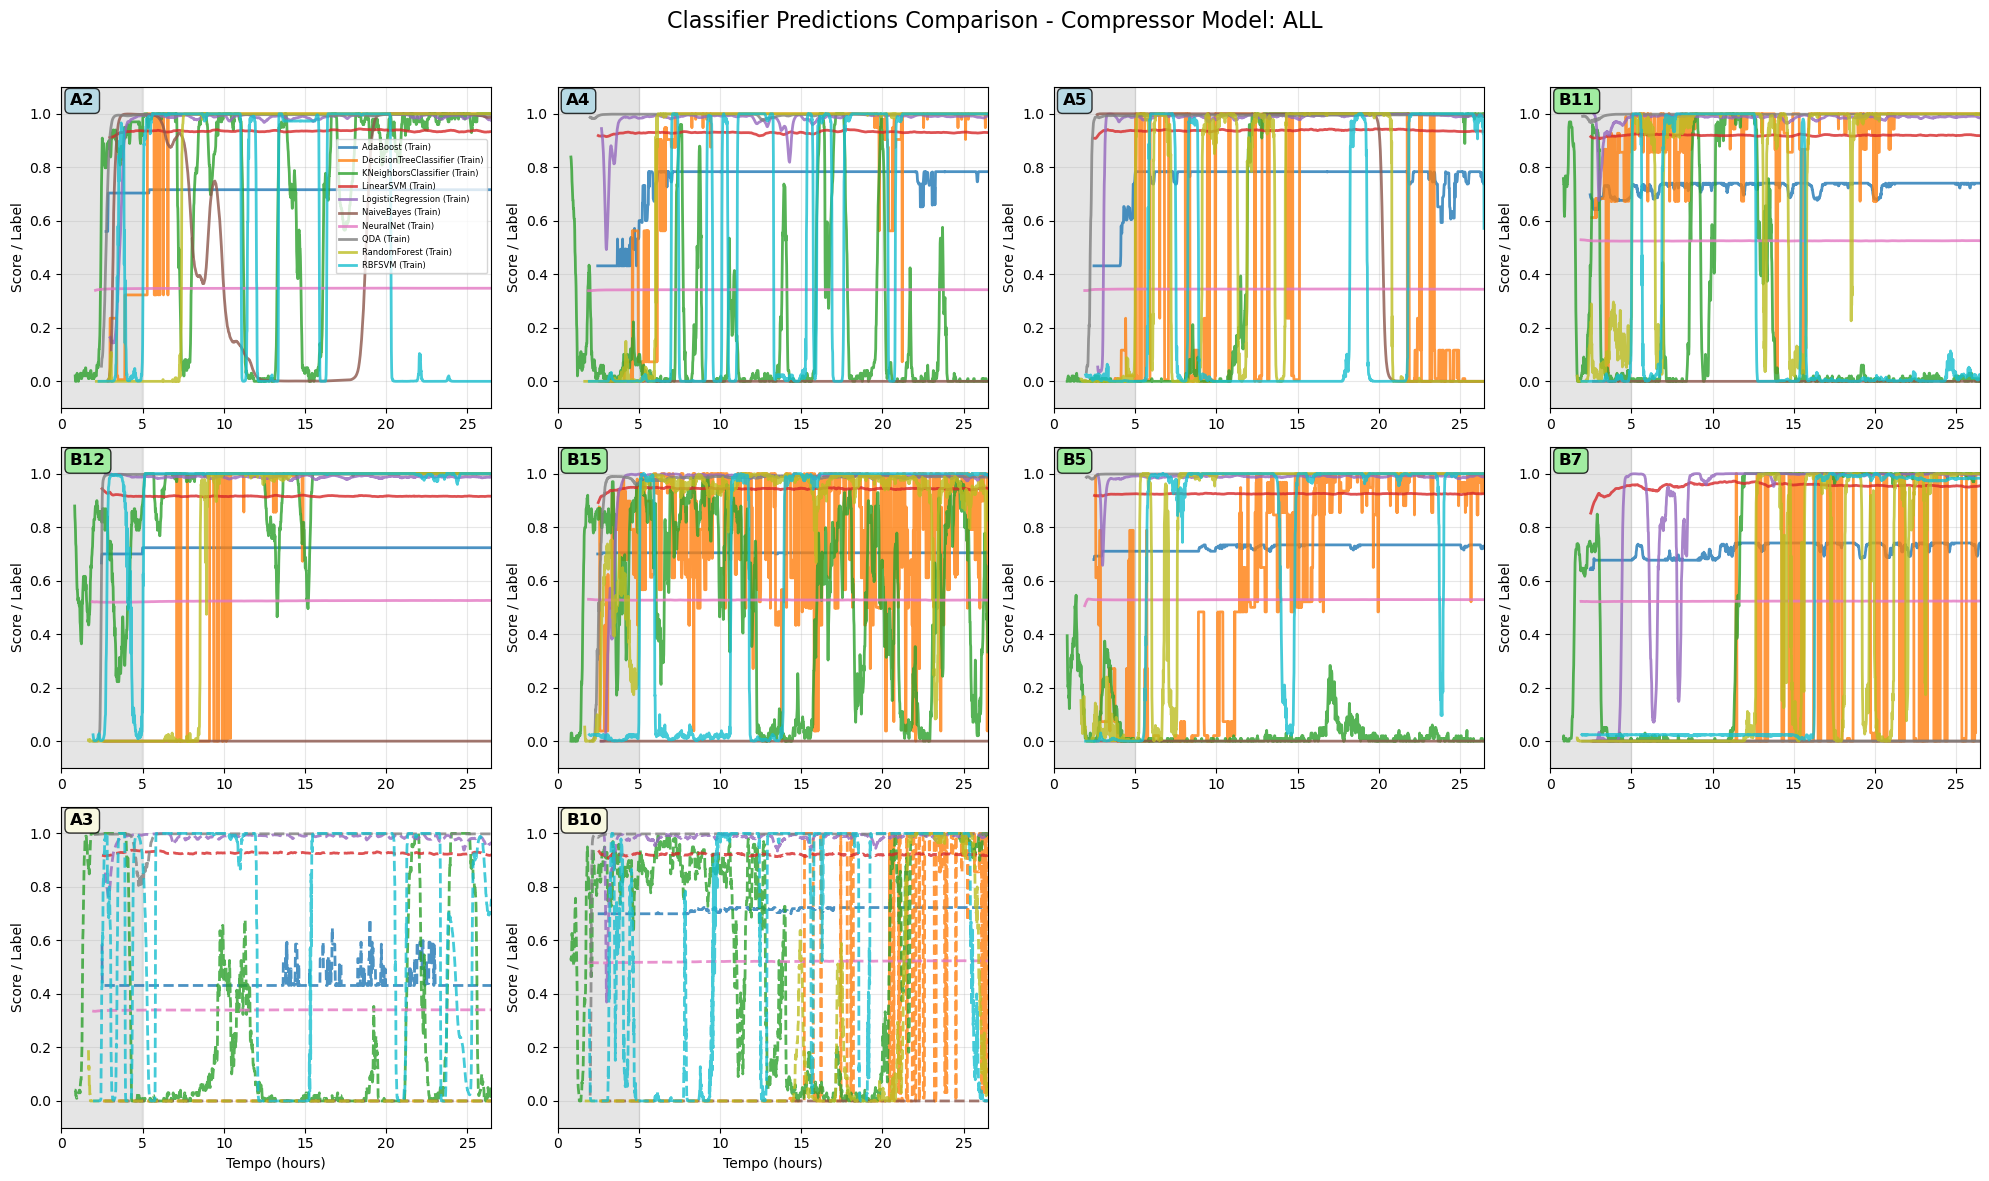

In [19]:
# Improved Plot for Compressor Model ALL
import matplotlib.colors as mcolors

# Focus on compressor model 'all'
model = 'all'
if model in data_first_test and data_first_test[model]:
    
    # Get all unique units for model 'all'
    all_units = set()
    for classifier, df in data_first_test[model].items():
        all_units.update(df['Unidade'].unique())
    
    all_units = sorted(list(all_units))
    print(f"Units found for model {model}: {all_units}")
    
    # For model 'all', the test units are typically 'a3' and 'b10'
    train_units = [unit for unit in all_units if unit not in ['a3', 'b10']]
    test_units = ['a3', 'b10']  # Both a3 and b10 are used for testing
    
    print(f"Train units: {train_units}")
    print(f"Test units: {test_units}")
    
    # Calculate the shortest test duration across all units and classifiers
    min_duration = float('inf')
    for classifier, df in data_first_test[model].items():
        for unit in all_units:
            unit_data = df[df['Unidade'] == unit]
            if len(unit_data) > 0:
                unit_duration = unit_data['Tempo'].max()
                min_duration = min(min_duration, unit_duration)
    
    print(f"Shortest test duration: {min_duration:.2f} hours")
    
    # Define colors for different classifiers
    colors = list(mcolors.TABLEAU_COLORS.values())
    
    # Arrange all units - we have 10 units total (8 train + 2 test)
    # Let's arrange them in a 3x4 grid (3 rows, 4 columns)
    all_units_to_plot = train_units + test_units
    n_units = len(all_units_to_plot)
    
    # Calculate grid dimensions - aim for roughly square layout
    if n_units <= 9:
        n_cols = 3
        n_rows = (n_units + n_cols - 1) // n_cols  # Ceiling division
    else:
        n_cols = 4
        n_rows = (n_units + n_cols - 1) // n_cols  # Ceiling division
    
    print(f"Grid layout: {n_rows} rows x {n_cols} columns for {n_units} units")
    
    # Create subplot layout
    fig = plt.figure(figsize=(5 * n_cols, 4 * n_rows))
    
    # Create axes for all units
    plot_axes = []
    for i, unit in enumerate(all_units_to_plot):
        ax = plt.subplot(n_rows, n_cols, i + 1)  # subplot positions are 1-indexed
        plot_axes.append((ax, unit))
    
    fig.suptitle(f'Classifier Predictions Comparison - Compressor Model: {model.upper()}', fontsize=16)
    
    # Plot data for each unit
    for ax, unit in plot_axes:
        print(f"\\nPlotting unit {unit}...")
        
        # Determine if this is a train or test unit
        is_test_unit = unit in test_units
        
        true_label_plotted = False
        
        for j, (classifier, df) in enumerate(data_first_test[model].items()):
            unit_df = df[df['Unidade'] == unit].sort_values('Tempo')
            
            if len(unit_df) == 0:
                continue
            
            # Separate test and train data
            train_df = unit_df[unit_df['data_type'] == 'train'].sort_values('Tempo')
            test_df = unit_df[unit_df['data_type'] == 'test'].sort_values('Tempo')
            
            color = colors[j % len(colors)]
            
            # Plot train data (solid line)
            if len(train_df) > 0:
                ax.plot(train_df['Tempo'], train_df['Y_score'], 
                       label=f'{classifier} (Train)', 
                       color=color, linewidth=2, alpha=0.8, linestyle='-')
            
            # Plot test data (dashed line) - only for test units
            if len(test_df) > 0 and is_test_unit:
                ax.plot(test_df['Tempo'], test_df['Y_score'], 
                       label=f'{classifier} (Test)', 
                       color=color, linewidth=2, alpha=0.8, linestyle='--')
            
            # Plot true labels only once
            if not true_label_plotted and len(unit_df) > 0:
                # Use all data for true labels
                tempo_all = unit_df['Tempo'].sort_values()
                y_true_all = unit_df.set_index('Tempo')['Y_true'].loc[tempo_all]
                
                # Shade background gray where Y_true == 0
                tempo_values = tempo_all.values
                y_true_values = y_true_all.values
                
                # Find continuous segments where Y_true == 0
                segments = []
                start_idx = None
                for idx in range(len(y_true_values)):
                    if y_true_values[idx] == 0:
                        if start_idx is None:
                            start_idx = idx
                    else:
                        if start_idx is not None:
                            segments.append((start_idx, idx - 1))
                            start_idx = None
                
                # Handle case where last segment extends to the end
                if start_idx is not None:
                    segments.append((start_idx, len(y_true_values) - 1))
                
                # Shade the segments
                for start_idx, end_idx in segments:
                    ax.axvspan(0, tempo_values[end_idx], 
                              color='gray', alpha=0.2)
                
                true_label_plotted = True
        
        # Set x-axis limits to shortest test duration
        ax.set_xlim(0, min_duration)
        
        # Add unit name as text box inside the plot
        # Use different colors for A and B series units
        unit_color = 'lightblue' if unit.startswith('a') else 'lightgreen'
        if unit in test_units:
            unit_color = 'lightyellow'  # Special color for test units
            
        ax.text(0.02, 0.98, unit.upper(), transform=ax.transAxes, 
               fontsize=12, fontweight='bold', 
               bbox=dict(boxstyle='round,pad=0.3', facecolor=unit_color, alpha=0.8),
               verticalalignment='top', horizontalalignment='left')
        
        ax.set_ylabel('Score / Label')
        ax.grid(True, alpha=0.3)
        ax.set_ylim(-0.1, 1.1)
        
        # Only show legend for the first plot to avoid clutter
        if unit == all_units_to_plot[0]:
            ax.legend(loc='upper right', bbox_to_anchor=(1.0, 0.85), fontsize=6)
    
    # Set x-label for bottom row plots
    for i in range(len(plot_axes)):
        row = i // n_cols
        if row == n_rows - 1:  # Bottom row
            plot_axes[i][0].set_xlabel('Tempo (hours)')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
else:
    print(f"No data found for model {model}")